### Task 1.1
Leer el archivo y guardarlo en un np array

In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# leer el archivo CSV
datos = pd.read_csv('framingham.csv')
# eliminar los encabezados
datos_sin_encabezados = datos.values[1:]

# convertir los datos a un array numpy
datos_np = np.array(datos_sin_encabezados, dtype=float)

print(datos_np)

[[  0.  46.   2. ...  95.  76.   0.]
 [  1.  48.   1. ...  75.  70.   0.]
 [  0.  61.   3. ...  65. 103.   1.]
 ...
 [  0.  48.   2. ...  84.  86.   0.]
 [  0.  44.   1. ...  86.  nan   0.]
 [  0.  52.   2. ...  80. 107.   0.]]


# Task 1.2
Ajustar un modelo de regresion logistica

In [92]:
# adjuntar las propiedades en X
# Fuma o no.
# Edad
fuma = datos_np[:,3]
edad = datos_np[:,1]

# Convertir las columnas en un np.array de dos dimensiones
X = np.column_stack((fuma, edad))

# eliminar datos faltantes
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
X = imp.fit_transform(X)

print(X)

# sufrió un paro cardíaco.
y = datos_np[:,-1]
print(y)

[[ 0. 46.]
 [ 1. 48.]
 [ 1. 61.]
 ...
 [ 1. 48.]
 [ 1. 44.]
 [ 0. 52.]]
[0. 0. 1. ... 0. 0. 0.]


### Task 1.3
Utilizar el algoritmo del gradiente con implementaciond e regresion logistica

[[ 1.  0. 40.]
 [ 1.  0. 10.]
 [ 1.  1.  5.]] [-0.00083153 -0.00041226 -0.03137567]
Predicciones -  [0.22168767 0.4219952  0.46055162]
0.45479012988703343


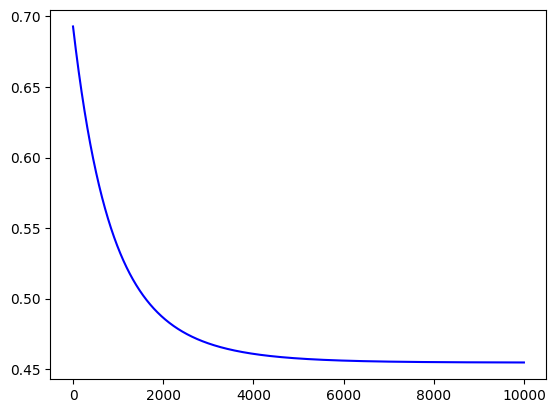

In [96]:
from logistic_reg import *

def logistic_regrresion(X, y, learning_rate, threshold, max_iter, lmbd):
    # Agregar columna de unos para el término independiente
    X = np.c_[np.ones(X.shape[0]), X]

    # Inicialización de parámetros
    n_features = X.shape[1]
    theta_initial = np.zeros(n_features)

    # Ejecución del algoritmo de descenso de gradiente
    theta, costs, _ = gradient_descent(
        theta_initial,
        logistic_cost,
        logistic_cost_gradient,
        learning_rate=learning_rate,
        threshold=threshold,
        max_iter=max_iter,
        params=[X, y, lmbd]
    )

    # Retornar los parámetros aprendidos y el historial de costos
    return theta, costs

lmbd = 0.1
learning_rate = 0.000001
theta_initial = np.zeros(X.shape[1])
max_iterations = 10000

theta, costs = logistic_regrresion(
    X,
    y,
    learning_rate,
    0.001,
    max_iterations,
    lmbd
)

# Realizar predicciones
# datos de prueba
X_test = np.array([[0, 40], [0, 10], [1, 5]])
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

print(X_test, theta)
predictions = sigmoid(X_test @ theta)

print("Predicciones - ", predictions)
# Costos
plt.plot(costs, color="blue")
print(costs[-1])
plt.show()

### Cross validation

[[ 0. 51.]
 [ 1. 51.]
 [ 1. 43.]
 ...
 [ 0. 56.]
 [ 1. 44.]
 [ 1. 36.]]
[0. 0. 0. ... 0. 0. 0.]
Teta reultante de entreno: 
[-0.00052724 -0.00052724 -0.00052724 -0.00030699 -0.0005723 ]
0.48575322841922164


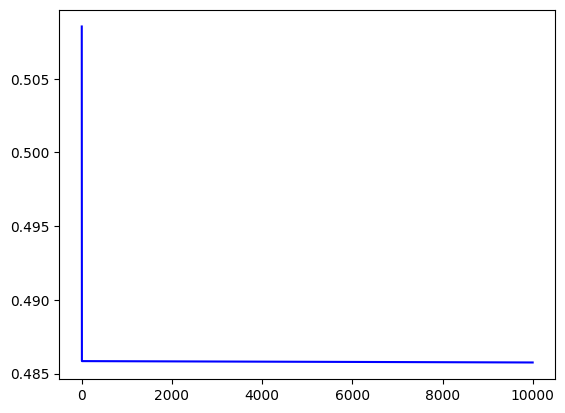

In [110]:
data = np.genfromtxt("framingham.csv", delimiter=",", skip_header=1, dtype=float)

#Desordenar los datos
np.random.shuffle(data)
cross_val_set = data.shape[0] // 3

# Dividimos 
test = data[:cross_val_set]
training = data[cross_val_set:]

# fuma
# Edad
fuma = training[:,3]
edad = training[:,1]

# Convertir las columnas en un np.array de dos dimensiones
X = np.column_stack((fuma, edad))

# eliminar datos faltantes
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
X = imp.fit_transform(X)

print(X)

# sufrió un paro cardíaco.
y = training[:,-1]
print(y)

# aumentar el polinomio a grado 2
X_train_poly = np.power(X, 2)
X_train_poly = np.column_stack((np.ones_like(X), X_train_poly))

learning_rate = 0.000001
theta, costs = logistic_regrresion(
    X_train_poly,
    y,
    learning_rate,
    0.001,
    max_iterations,
    lmbd
)

# Realizar predicciones
# datos de prueba
print("Teta reultante de entreno: ")
print(theta)

# Costos
plt.plot(costs, color="blue")
print(costs[-1])
plt.show()

[[ 0. 59.]
 [ 0. 55.]
 [ 0. 42.]
 ...
 [ 1. 62.]
 [ 0. 46.]
 [ 0. 62.]]
[1. 0. 1. ... 0. 0. 0.]


c:\Users\Mark\Documents\Universidad\IA\lab4\logistic_reg.py:5: RuntimeWarning: overflow encountered in exp
  """Función sigmoide"""
c:\Users\Mark\Documents\Universidad\IA\lab4\logistic_reg.py:11: RuntimeWarning: divide by zero encountered in log
  reg = (lmbd / (2 * len(X))) * (theta[1:] ** 2).sum()
c:\Users\Mark\Documents\Universidad\IA\lab4\logistic_reg.py:11: RuntimeWarning: invalid value encountered in multiply
  reg = (lmbd / (2 * len(X))) * (theta[1:] ** 2).sum()


Teta reultante de entreno: 
[-0.00046881 -0.00046881 -0.00046881 -0.00017031 -0.03171026]
nan


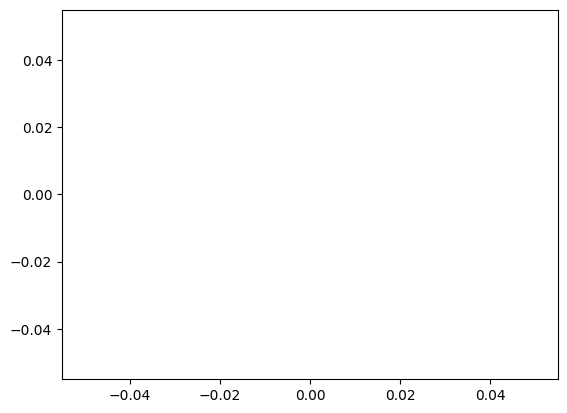

In [111]:
data = np.genfromtxt("framingham.csv", delimiter=",", skip_header=1, dtype=float)

#Desordenar los datos
np.random.shuffle(data)
cross_val_set = data.shape[0] // 3

# Dividimos 
test = data[:cross_val_set]
training = data[cross_val_set:]

# fuma
# Edad
fuma = test[:,3]
edad = test[:,1]

# Convertir las columnas en un np.array de dos dimensiones
X = np.column_stack((fuma, edad))

# eliminar datos faltantes
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
X = imp.fit_transform(X)

print(X)

# sufrió un paro cardíaco.
y = test[:,-1]
print(y)

# aumentar el polinomio a grado 4
X_train_poly = np.power(X, 4)
X_train_poly = np.column_stack((np.ones_like(X), X_train_poly))

learning_rate = 0.000001
theta, costs = logistic_regrresion(
    X_train_poly,
    y,
    learning_rate,
    0.001,
    max_iterations,
    lmbd
)

# Realizar predicciones
# datos de prueba
print("Teta reultante de entreno: ")
print(theta)

# Costos
plt.plot(costs, color="blue")
print(costs[-1])
plt.show()

### Task 1.5

Podemos ver que con un polinomio grado 4 obtenemos resultados completamente fuera de lugar, un polinomio adecuado podría ser k = 2 o k = 1, vemos que tiene un mejor rendimiento. Con un polinomio grado k = 4 en adelante obtenemos una gráfica de costos incorrecta y nos avis aque nuestro modelo no se ajusta. Considero que esto se debe a las features de nuestra variable X debido a que al recibir varios datos no termina de ajustarse al modelo. Para mejorar el rendimiento considero elegir un buen número específico de features para realizar predicciones.